In [4]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install dvclive --upgrade
!pip install ultralytics --upgrade
!pip install supervision --upgrade
!pip install pynvml --upgrade
!pip install sahi --upgrade
!pip install albumentations --upgrade
!pip install plotly --upgrade
!pip install sahi --upgrade
!pip install opencv-python --upgrade


919.28s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


927.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 KB 5.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.78
    Uninstalling ultralytics-8.2.78:
      Successfully uninstalled ultralytics-8.2.78


936.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


945.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


953.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


962.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


969.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


979.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


986.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.9.0.80
    Uninstalling opencv-python-4.9.0.80:
      Successfully uninstalled opencv-python-4.9.0.80
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sahi 0.11.18 requires opencv-python<=4.9.0.80, but you have opencv-python 4.10.0.84 which is incompatible.


In [1]:
import os
print(os.getcwd())

import torch
from ultralytics import YOLO
import supervision as sv
import numpy as np
import cv2
from matplotlib import pyplot as plt

VIDEO_PATH = "Labeled-videos/05110122.MP4"
video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

/home/jorge/Documents/Swifts.Research.Project


/home/jorge/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
!python --version

/bin/bash: line 1: python: command not found


In [3]:

from ultralytics.data.augment import Albumentations
from ultralytics.utils import LOGGER, colorstr

def __init__(self, p=1.0):
        """Initialize the transform object for YOLO bbox formatted params."""
        self.p = p
        self.transform = None
        prefix = colorstr("albumentations: ")

        try:
            import albumentations as A

            check_version(A.__version__, "1.0.3", hard=True)  # version requirement

            # List of possible spatial transforms
            spatial_transforms = {
                "Affine",
                "BBoxSafeRandomCrop",
                "CenterCrop",
                "CoarseDropout",
                "Crop",
                "CropAndPad",
                "CropNonEmptyMaskIfExists",
                "D4",
                "ElasticTransform",
                "Flip",
                "GridDistortion",
                "GridDropout",
                "HorizontalFlip",
                "Lambda",
                "LongestMaxSize",
                "MaskDropout",
                "MixUp",
                "Morphological",
                "NoOp",
                "OpticalDistortion",
                "PadIfNeeded",
                "Perspective",
                "PiecewiseAffine",
                "PixelDropout",
                "RandomCrop",
                "RandomCropFromBorders",
                "RandomGridShuffle",
                "RandomResizedCrop",
                "RandomRotate90",
                "RandomScale",
                "RandomSizedBBoxSafeCrop",
                "RandomSizedCrop",
                "Resize",
                "Rotate",
                "SafeRotate",
                "ShiftScaleRotate",
                "SmallestMaxSize",
                "Transpose",
                "VerticalFlip",
                "XYMasking",
            }  # from https://albumentations.ai/docs/getting_started/transforms_and_targets/#spatial-level-transforms

            # Transforms
            T = [A.RandomRain(p=0.1, slant_lower=-10, slant_upper=10, 
                              drop_length=20, drop_width=1, drop_color=(200, 200, 200), 
                              blur_value=5, brightness_coefficient=0.9, rain_type=None),
                    A.Rotate(limit = 10, p=0.5),
                    A.ToGray(p=0.1),
                    A.ImageCompression(quality_lower=75, p=0.1),
                    A.OneOf([
                        A.IAAAdditiveGaussianNoise(),
                        A.GaussNoise(),
                    ], p=0.2),
                    A.OneOf([
                        A.MotionBlur(p=0.2),
                        A.MedianBlur(blur_limit=3, p=0.1),
                        A.Blur(blur_limit=3, p=0.1),
                    ], p=0.2),
                    A.OneOf([
                        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.3),
                        A.RandomRotate90(p=0.3),
                        A.Flip(p=0.3),
                        A.Transpose(p=0.3),
                    ],p=0.3),
                    A.OneOf([
                        A.OpticalDistortion(p=0.3),
                        A.GridDistortion(p=.1),
                        A.IAAPiecewiseAffine(p=0.3),
                    ], p=0.2),
                    A.OneOf([
                        A.CLAHE(clip_limit=2),
                        A.IAASharpen(),
                        A.IAAEmboss(),
                        A.RandomContrast(),
                        A.RandomBrightness(),
                        A.RandomBrightnessContrast(p=0.1),
                        A.RandomGamma(p=0.1),
                    ], p=0.3),
                    A.HueSaturationValue(p=0.3),
                    A.ToTensor()
                ]

            # Compose transforms
            self.contains_spatial = any(transform.__class__.__name__ in spatial_transforms for transform in T)
            self.transform = (
                A.Compose(T, bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))
                if self.contains_spatial
                else A.Compose(T)
            )
            LOGGER.info(prefix + ", ".join(f"{x}".replace("always_apply=False, ", "") for x in T if x.p))
        except ImportError:  # package not installed, skip
            pass
        except Exception as e:
            LOGGER.info(f"{prefix}{e}")

Albumentations.__init__ = __init__

In [ ]:
model = YOLO("yolov8x.pt")
#model=YOLO("runs/detect/train11/weights/best.pt")

In [ ]:
results = model.train(data="frame_labels_yolo/dataset.yaml", epochs=200, imgsz=640, batch=4, lr0=0.0001, device=0)

In [ ]:
model=YOLO("runs/detect/train16/weights/best.pt")

In [ ]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model.track(frame, imgsz=1280, persist=True)[0]

    detections = sv.Detections.from_ultralytics(results)

    box_annotator = sv.BoundingBoxAnnotator(thickness=4)
    label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)

    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections)
    frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)

    return frame

In [ ]:
sv.process_video(source_path=VIDEO_PATH, target_path=f"result.mp4", callback=process_frame)

In [ ]:
from pynvml import *

nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {info.total}')
print(f'free     : {info.free}')
print(f'used     : {info.used}')
torch.cuda.empty_cache()

h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {info.total}')
print(f'free     : {info.free}')
print(f'used     : {info.used}')

Add method to run with sahi.

In [ ]:

import argparse
from pathlib import Path

from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction
from sahi.utils.yolov8 import download_yolov8s_model

from ultralytics.utils.files import increment_path


def perform_inference_tracking(self, image: np.ndarray):
    """
    Prediction is performed using self.model and the prediction result is set to self._original_predictions.
    If predictions have masks, each prediction is a tuple like (boxes, masks).
    Args:
        image: np.ndarray
            A numpy array that contains the image to be predicted. 3 channel image should be in RGB order.

    """

    from ultralytics.engine.results import Masks

    # Confirm model is loaded
    if self.model is None:
        raise ValueError("Model is not loaded, load it by calling .load_model()")

    kwargs = {"cfg": self.config_path, "verbose": False, "conf": self.confidence_threshold, "device": self.device}

    if self.image_size is not None:
        kwargs = {"imgsz": self.image_size, **kwargs}

    prediction_result = self.model.track(image[:, :, ::-1], **kwargs, persist=True)  # YOLOv8 expects numpy arrays to have BGR

    if self.has_mask:
        if not prediction_result[0].masks:
            prediction_result[0].masks = Masks(
                torch.tensor([], device=self.model.device), prediction_result[0].boxes.orig_shape
            )

        # We do not filter results again as confidence threshold is already applied above
        prediction_result = [
            (
                result.boxes.data,
                result.masks.data,
            )
            for result in prediction_result
        ]

    else:  # If model doesn't do segmentation then no need to check masks
        # We do not filter results again as confidence threshold is already applied above
        prediction_result = [result.boxes.data for result in prediction_result]

    self._original_predictions = prediction_result
    self._original_shape = image.shape

def sahi_run(weights="yolov8n.pt", source="test.mp4", view_img=False, save_img=False, exist_ok=False, track = False):
    """
    Run object detection on a video using YOLOv8 and SAHI.

    Args:
        weights (str): Model weights path.
        source (str): Video file path.
        view_img (bool): Show results.
        save_img (bool): Save results.
        exist_ok (bool): Overwrite existing files.
    """

    # Check source path
    if not Path(source).exists():
        raise FileNotFoundError(f"Source path '{source}' does not exist.")

    yolov8_model_path = weights
    download_yolov8s_model(yolov8_model_path)
    detection_model = AutoDetectionModel.from_pretrained(
        model_type="yolov8", model_path=yolov8_model_path, confidence_threshold=0.3, device="cpu"
    )
    if track:
        detection_model.perform_inference = perform_inference_tracking
    # Video setup
    videocapture = cv2.VideoCapture(source)
    frame_width, frame_height = int(videocapture.get(3)), int(videocapture.get(4))
    fps, fourcc = int(videocapture.get(5)), cv2.VideoWriter_fourcc(*"mp4v")

    # Output setup
    save_dir = increment_path(Path("ultralytics_results_with_sahi") / "exp", exist_ok)
    save_dir.mkdir(parents=True, exist_ok=True)
    video_writer = cv2.VideoWriter(str(save_dir / f"{Path(source).stem}.mp4"), fourcc, fps, (frame_width, frame_height))

    while videocapture.isOpened():
        success, frame = videocapture.read()
        if not success:
            break

        results = get_sliced_prediction(
            frame, detection_model, slice_height=512, slice_width=512, overlap_height_ratio=0.2, overlap_width_ratio=0.2
        )
        object_prediction_list = results.object_prediction_list

        boxes_list = []
        clss_list = []
        for ind, _ in enumerate(object_prediction_list):
            boxes = (
                object_prediction_list[ind].bbox.minx,
                object_prediction_list[ind].bbox.miny,
                object_prediction_list[ind].bbox.maxx,
                object_prediction_list[ind].bbox.maxy,
            )
            clss = object_prediction_list[ind].category.name
            boxes_list.append(boxes)
            clss_list.append(clss)

        for box, cls in zip(boxes_list, clss_list):
            x1, y1, x2, y2 = box
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (56, 56, 255), 2)
            label = str(cls)
            t_size = cv2.getTextSize(label, 0, fontScale=0.6, thickness=1)[0]
            cv2.rectangle(
                frame, (int(x1), int(y1) - t_size[1] - 3), (int(x1) + t_size[0], int(y1) + 3), (56, 56, 255), -1
            )
            cv2.putText(
                frame, label, (int(x1), int(y1) - 2), 0, 0.6, [255, 255, 255], thickness=1, lineType=cv2.LINE_AA
            )

        if view_img:
            #cv2.imshow(Path(source).stem, frame)
            plt.imshow(frame)
            plt.show()
        if save_img:
            video_writer.write(frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    video_writer.release()
    videocapture.release()
    cv2.destroyAllWindows()

In [ ]:
sahi_run("runs/detect/train6/weights/best.pt",VIDEO_PATH, True, True, False)

Testing YOLO tracking

In [ ]:
from ultralytics.utils.files import increment_path

from pathlib import Path

# Open the video file
video_path = VIDEO_PATH
cap = cv2.VideoCapture(video_path)

 # Video setup
frame_width, frame_height = int(cap.get(3)), int(cap.get(4))
fps, fourcc = int(cap.get(5)), cv2.VideoWriter_fourcc(*"mp4v")

# Output setup
save_dir = increment_path(Path("ultralytics_results_with_tracking") / "exp", True)
save_dir.mkdir(parents=True, exist_ok=True)
video_writer = cv2.VideoWriter(str(save_dir / f"{Path(video_path).stem}.mp4"), fourcc, fps, (frame_width, frame_height))


# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        #cv2.imshow(annotated_frame)
        
        plt.imshow(annotated_frame)
        plt.show()
        
        video_writer.write(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Testing segmentation.



In [ ]:
model = YOLO("yolov8s-seg.pt")
#model = YOLO("runs/segment/train4/weights/best.pt")
results = model.train(data="frame_labels_yolo/dataset.yaml", epochs=20, imgsz=640, batch=8, lr0=0.0001)

New https://pypi.org/project/ultralytics/8.2.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (13th Gen Intel Core(TM) i7-1355U)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=frame_labels_yolo/dataset.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

100%|██████████| 755k/755k [00:00<00:00, 6.98MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Create a Git repo (`git init`) and commit (`git commit`).


DVCLive is detected and auto logging is enabled (run 'yolo settings dvc=False' to disable).
TensorBoard: Start with 'tensorboard --logdir runs/segment/train4', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/train/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001...:   0%|          | 0/297 [00:00<?, ?it/s]Scanning /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/train/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001... 68 images, 0 backgrounds, 0 corrupt:  23%|██▎       | 68/297 [00:00<00:00, 670.56it/s]Scanning /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/train/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001... 136 images, 0 backgrounds, 0 corrupt:  46%|████▌     | 136/297 [00:00<00:00, 590.82it/s]Scanning /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/train/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001... 201 images, 0 backgrounds, 0 corrupt:  68%|██████▊   | 201/297 [00:00<00:00, 606.89it/s]Scanning /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/train/Unlabeled-videos/Camera1/Day/20230606

train: New cache created: /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/train/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001.cache


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.12). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


albumentations: name 'check_version' is not defined


val: Scanning /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001...:   0%|          | 0/54 [00:00<?, ?it/s]Scanning /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 700.99it/s]


val: New cache created: /home/jorge/Documents/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001.cache
Plotting labels to runs/segment/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.875      3.591       3.15      1.507         14        640: 100%|██████████| 38/38 [06:55<00:00, 10.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:18<00:00,  4.68s/it]


                   all         54        422      0.705      0.306      0.293      0.146      0.673      0.279      0.242      0.096

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.567      2.883      1.616      1.294         26        640: 100%|██████████| 38/38 [07:02<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.30s/it]


                   all         54        422       0.78      0.387      0.407      0.234      0.755      0.364       0.37      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.491      2.708      1.402       1.26          4        640: 100%|██████████| 38/38 [06:53<00:00, 10.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.45s/it]


                   all         54        422      0.827      0.427      0.464      0.257      0.808      0.412      0.433      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.451      2.624      1.272      1.224         31        640: 100%|██████████| 38/38 [06:51<00:00, 10.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.24s/it]


                   all         54        422      0.853      0.444      0.563      0.309      0.824      0.421      0.485      0.224

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.428      2.563      1.132      1.208         27        640: 100%|██████████| 38/38 [06:52<00:00, 10.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.12s/it]


                   all         54        422      0.724      0.429      0.551      0.326        0.7      0.406      0.514      0.235

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.367      2.435      1.049       1.19         20        640: 100%|██████████| 38/38 [06:50<00:00, 10.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.07s/it]


                   all         54        422      0.628      0.563      0.639      0.411        0.6      0.541      0.606      0.285

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.334      2.392      1.024      1.162         33        640: 100%|██████████| 38/38 [06:53<00:00, 10.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.10s/it]


                   all         54        422       0.65      0.524      0.607      0.388      0.616      0.499      0.575      0.285

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.305      2.365     0.9772      1.138         28        640: 100%|██████████| 38/38 [06:51<00:00, 10.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.96s/it]


                   all         54        422      0.592      0.594        0.6      0.383      0.569      0.571      0.569      0.293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.238      2.252     0.9003      1.127         15        640: 100%|██████████| 38/38 [06:48<00:00, 10.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.91s/it]


                   all         54        422      0.656      0.628      0.646       0.42      0.635      0.605      0.614      0.311

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.214      2.214     0.8928      1.118         34        640: 100%|██████████| 38/38 [06:45<00:00, 10.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.94s/it]


                   all         54        422      0.528      0.647      0.629      0.417      0.513      0.623      0.606      0.302
Closing dataloader mosaic
albumentations: name 'check_version' is not defined

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G       1.21      2.187     0.8923      1.133          3        640: 100%|██████████| 38/38 [06:29<00:00, 10.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.93s/it]


                   all         54        422      0.688      0.617      0.659      0.433       0.67        0.6      0.636      0.322

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.185      2.097     0.8367      1.152          6        640: 100%|██████████| 38/38 [06:29<00:00, 10.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.04s/it]


                   all         54        422      0.749      0.528      0.684      0.456      0.735      0.499      0.652      0.353

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.148      2.036      0.785       1.12          3        640: 100%|██████████| 38/38 [06:35<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.24s/it]


                   all         54        422      0.753      0.587      0.694      0.463      0.735      0.566       0.66      0.342

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.126      2.009     0.7612      1.084          6        640: 100%|██████████| 38/38 [06:48<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.05s/it]


                   all         54        422      0.753      0.568       0.69      0.463      0.741      0.549      0.663      0.345

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.103      1.935     0.7397      1.074          3        640: 100%|██████████| 38/38 [06:54<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.00s/it]


                   all         54        422       0.71      0.622      0.683      0.467      0.693      0.597      0.689      0.366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.081      1.969     0.7173      1.064          3        640: 100%|██████████| 38/38 [06:45<00:00, 10.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.06s/it]


                   all         54        422      0.724      0.612       0.68      0.456      0.713      0.587      0.663      0.352

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.039      1.878     0.6815      1.042          3        640: 100%|██████████| 38/38 [06:50<00:00, 10.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.01s/it]


                   all         54        422      0.724      0.598      0.681      0.467      0.693      0.581      0.674      0.351

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G       1.03      1.847      0.671       1.05          3        640: 100%|██████████| 38/38 [06:55<00:00, 10.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.05s/it]


                   all         54        422      0.723      0.619       0.69      0.482      0.722      0.576      0.674       0.36

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.018      1.851      0.653      1.029         14        640: 100%|██████████| 38/38 [06:47<00:00, 10.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.08s/it]


                   all         54        422      0.746      0.608      0.689      0.477       0.73      0.586      0.686      0.371

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.008      1.798     0.6424       1.03          4        640: 100%|██████████| 38/38 [2:27:53<00:00, 233.51s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.76s/it]


                   all         54        422      0.731      0.624      0.695      0.482      0.733      0.667      0.734      0.391

20 epochs completed in 4.718 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 23.8MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (13th Gen Intel Core(TM) i7-1355U)
YOLOv8s-seg summary (fused): 195 layers, 11,781,922 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.74s/it]


                   all         54        422      0.732      0.624      0.695       0.48      0.732      0.667      0.734       0.39
                  Nest         54        158      0.949      0.816      0.901        0.6      0.878      0.797      0.848      0.461
           Adult swift         43        105      0.921        0.8      0.833      0.626      0.861      0.771      0.834      0.483
           Swift chick         38         66      0.875      0.818      0.864      0.523      0.774      0.788      0.849      0.436
Fledgeling swift chick         18         85       0.92      0.811      0.909      0.646      0.877        0.8      0.876      0.515
             Swift egg          3          6          0          0          0          0          0          0          0          0
Adult swift with filled crop          2          2      0.725        0.5      0.662      0.485          1      0.848      0.995      0.448
Speed: 0.9ms preprocess, 240.3ms inference, 0.0ms loss, 0.7ms p

AttributeError: 'NoneType' object has no attribute 'add'

/home/jorge/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Performing prediction on 6 slices.


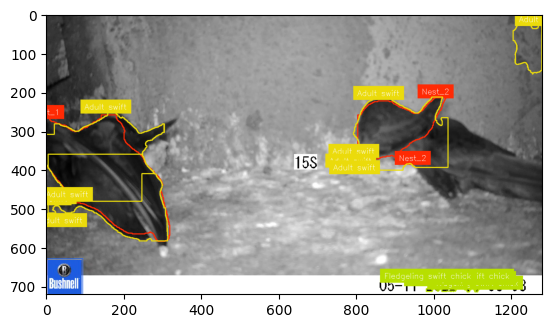

Performing prediction on 6 slices.


error: OpenCV(4.10.0) /io/opencv/modules/video/src/lkpyramid.cpp:1394: error: (-215:Assertion failed) prevPyr[level * lvlStep1].size() == nextPyr[level * lvlStep2].size() in function 'calc'


In [1]:
from sahi_tracking import sahi_run_segment

VIDEO_PATH = "Labeled-videos/05110122.MP4"

sahi_run_segment("runs/segment/train4/weights/best.pt", VIDEO_PATH, True, True, False, track=True)

In [ ]:
from collections import defaultdict

import cv2

from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
from matplotlib import pyplot as plt

track_history = defaultdict(lambda: [])

model = YOLO("runs/segment/train14/weights/best.pt")  # segmentation model
cap = cv2.VideoCapture(VIDEO_PATH)
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

out = cv2.VideoWriter("instance-segmentation-object-tracking.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

while True:
    ret, im0 = cap.read()
    if not ret:
        break

    annotator = Annotator(im0, line_width=2)
    results = model.track(im0, persist=True)

    if results[0].boxes.id is not None and results[0].masks is not None:
        masks = results[0].masks.xy
        track_ids = results[0].boxes.id.int().cpu().tolist()

        for mask, track_id in zip(masks, track_ids):
            annotator.seg_bbox(mask=mask, mask_color=colors(track_id, True), track_label=str(track_id))

    out.write(im0)
    #cv2.imshow("instance-segmentation-object-tracking", im0)
    plt.imshow(im0)
    plt.show()
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

out.release()
cap.release()
cv2.destroyAllWindows()

ConnectionError: HTTPSConnectionPool(host='api.github.com', port=443): Max retries exceeded with url: /repos/ultralytics/assets/releases/tags/v8.2.0 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7a26f1619ae0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

See results of different experiments.

In [ ]:
import dvc.api
import pandas as pd

# Define the columns of interest
columns = ["Experiment", "epochs", "imgsz", "model", "metrics.mAP50-95(B)"]

# Retrieve experiment data
df = pd.DataFrame(dvc.api.exp_show(), columns=columns)

# Clean the data
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(df)

In [ ]:
from plotly.express import parallel_coordinates

# Create a parallel coordinates plot
fig = parallel_coordinates(df, columns, color="metrics.mAP50-95(B)")

# Display the plot
fig.show()

In [ ]:
# Generate DVC comparative plots
!python3 -m dvc plots diff $(python3 -m dvc exp list --names-only)

In [ ]:
from IPython.display import HTML

# Display the DVC plots as HTML
HTML(filename="./dvc_plots/index.html")

In [ ]:
dvc.api.exp_show()